In [3]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Loading the dataset
data = pd.read_csv("concatenated_data_v3.csv") ##TODO 


In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [54]:


# Prepare the data for training
X = data.loc[:, 'ACSTOTPOP':].values # Features
y = data.loc[:, 'Any Landfill'].values # Target variable (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7329896907216494


In [55]:
# Importing required libraries

import shap

In [27]:
# _test_df = pd.DataFrame(X_test, columns=data.columns[1:])



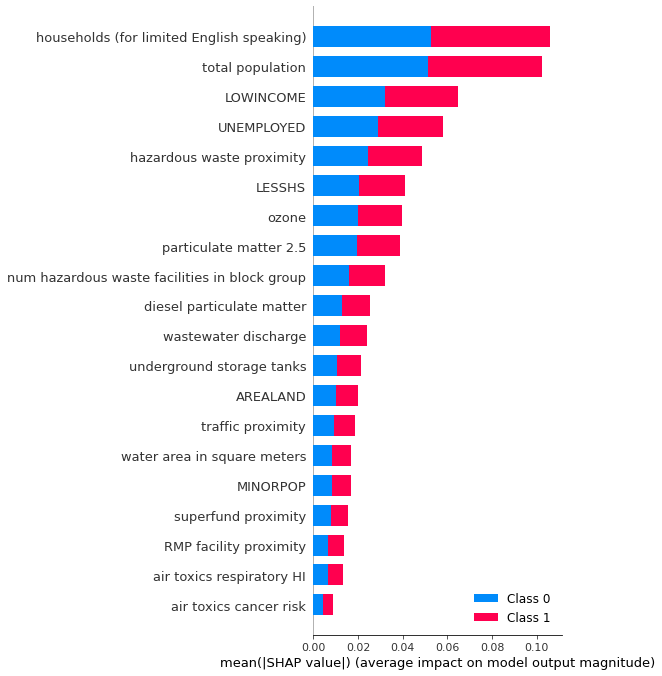

In [56]:

# Explaining the predictions using SHAP values
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)
feature_rename_dict = {
    "ACSTOTPOP": 'total population',
    "ACSTOTHH": 'households (for limited English speaking)',
    "MINORPCT": '% people of color',
    "LOWINCPCT": '% low income',
    "UNEMPPCT": '% unemployed',
    "LESSHSPCT": '% less than high school education',
    "PM25": 'particulate matter 2.5',
    "OZONE": 'ozone',
    "DSLPM": 'diesel particulate matter',
    "CANCER": 'air toxics cancer risk',
    "RESP": 'air toxics respiratory HI',
    "PTRAF": 'traffic proximity',
    "PNPL": 'superfund proximity',
    "PRMP": 'RMP facility proximity',
    "PTSDF": 'hazardous waste proximity',
    "UST": 'underground storage tanks',
    "PWDIS": 'wastewater discharge',
    "AREA": 'land area in square meters',
    "AREAWATER": 'water area in square meters',
    "NPL_CNT": 'num superfund facilities in block group',
    "TSDF_CNT": 'num hazardous waste facilities in block group',
}

# # Visualizing the SHAP values for a single prediction
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

# Visualizing the summary plot of the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)

In [49]:
# shap_values_explainer= explainer(X_test)
# shap.plots.bar(shap_values_explainer)


In [50]:
# shap.dependence_plot(shap_values, X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)


In [51]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test[0,:], feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)



In [52]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test[0,:], feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)
